In [2]:
import pandas as pd 
import numpy as np

In [3]:
df=pd.read_csv('spam_utf-8.txt')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4747,ham,The beauty of life is in next second.. which h...,NaN,NaN,NaN
4530,ham,I wish things were different. I wonder when i ...,NaN,NaN,NaN
4057,ham,Hi di is yijue we're meeting at 7 pm at esapla...,NaN,NaN,NaN
3387,ham,Same as kallis dismissial in 2nd test:-).,NaN,NaN,NaN
3841,ham,"chile, please! It's only a &lt;DECIMAL&gt; h...",NaN,NaN,NaN


In [4]:
# data cleaning
# EDA 
# text  preprocessing 
# model biulding 
#evluation
# improvement 
# website 
# deploy


In [5]:
# 1- data cleaning 



In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample(5)

,v1,v2
3982,ham,Nationwide auto centre (or something like that...
2268,spam,88066 FROM 88066 LOST 3POUND HELP
57,ham,"Sorry, I'll call later in meeting."
4208,ham,I want kfc its Tuesday. Only buy 2 meals ONLY ...
907,ham,I.ll give her once i have it. Plus she said gr...


In [8]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [9]:
df.sample()

,target,text
5357,ham,Ok


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [11]:
df['target']=encoder.fit_transform(df['target'])

In [87]:
df.sample(5)

,target,text,num_char,num_word,num_sent,transformed_text
2504,0,"Hello, my boytoy! I made it home and my consta...",160,42,3,hello boytoy made home constant thought love h...
4853,0,"Also north carolina and texas atm, you would j...",109,25,1,also north carolina texa atm would go gre site...
3618,1,8007 25p 4 Alfie Moon's Children in Need song ...,166,36,3,8007 25p 4 alfi moon children need song ur mob...
1686,1,todays vodafone numbers ending with 0089(my la...,174,32,2,today vodafon number end 0089 last four digit ...
5496,0,Yes... I trust u to buy new stuff ASAP so I ca...,58,16,2,ye trust u buy new stuff asap tri


In [13]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
# check is there any duplicate if yes remove 
df.duplicated().sum()
# 403 row are duplicated 

np.int64(403)

In [15]:
df=df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df.shape

(5169, 2)

In [18]:
# EDA

In [19]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x18fad122120>,
 [Text(-1.014499732282844, 0.4251944181172162, 'ham'),
  Text(1.0144998708287172, -0.42519408755122207, 'spam')],
 [Text(-0.5533634903360967, 0.2319242280639361, '87.37'),
  Text(0.553363565906573, -0.231924047755212, '12.63')])

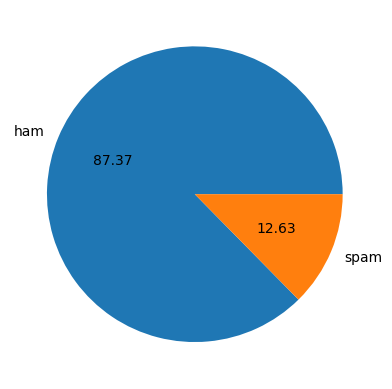

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')

In [21]:
# from graph we see there is inbalance 

In [22]:
!pip install nltk


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
import nltk

In [24]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt_tab: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [25]:
df['num_char']=df['text'].apply(len)# provide no of letter in each text
df.sample()

,target,text,num_char
843,1,Urgent! call 09066350750 from your landline. Y...,153


In [26]:

from nltk.tokenize import word_tokenize



In [27]:
df['num_word']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))# no of word in meassage

In [28]:
df['num_word'] 

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: num_word, Length: 5169, dtype: int64

In [29]:
df.head()

,target,text,num_char,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [30]:
from nltk.tokenize import sent_tokenize
df['num_sent']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))# no of sentance in message

In [31]:
df.sample()

,target,text,num_char,num_word,num_sent
2955,0,Yes there were many sweets,26,5,1


In [32]:
#see ham mathmatical analysis
df[df['target']==0][['num_char','num_word','num_sent']].describe()


,num_char,num_word,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459699,17.123782,1.820195
std,56.358868,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
# see spam mathematical analysis
df[df['target']==1][['num_char','num_word','num_sent']].describe()

,num_char,num_word,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [34]:
# what we compare form here avg no of char,sent,word is more in spam message compare to ham message

In [35]:
df[['target','num_char','num_word','num_sent']].corr()# there is 1 col which is string 

,target,num_char,num_word,num_sent
target,1.000000,0.384711,0.262912,0.263939
num_char,0.384711,1.000000,0.965763,0.624141
num_word,0.262912,0.965763,1.000000,0.679971
num_sent,0.263939,0.624141,0.679971,1.000000


In [36]:
# DATA PREPROCESSING ( put on text colm)
#1 lower case 
#2 tokenization
#2 removing special character
#3 removing stop words and puncttuation (mean like is,am ,are ....)
# 4 stemming 

In [37]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        if  i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)

In [38]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [39]:
import string

In [40]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [41]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('dancing')

'danc'

In [42]:
transform_text('I Loved the yt lectures on Machine learing . how About you ?')

'love yt lectur machin lear'

In [43]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [44]:
transform_text(df['text'][10])

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [45]:
# our transformation func is ready now we apply it on data frame(text)


In [46]:
df['transformed_text']=df['text'].apply(transform_text)# we add extra colm in data

In [47]:
df.head()

,target,text,num_char,num_word,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [48]:
# now we see whaat are the comman word which repeated in ham and spam messages 

In [49]:

from wordcloud import WordCloud
wc= WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [50]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))# give comman word in spam message 

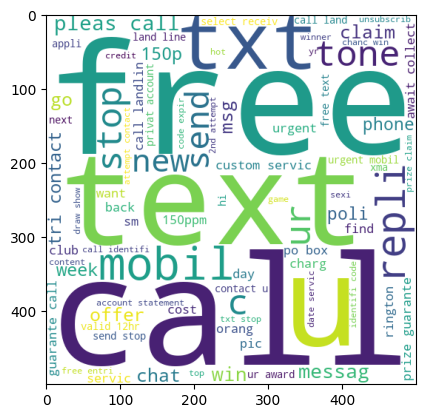

In [51]:
plt.imshow(spam_wc)


In [52]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

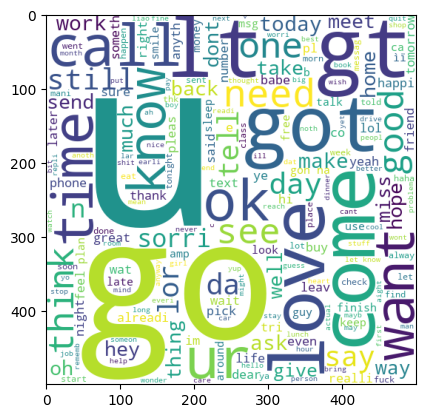

In [53]:
plt.imshow(ham_wc)

In [54]:
# now we see top 30 word of both ham spam which repated contiously in message 

In [55]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)  # spam corpus give no of word and it count how many time they repated

In [56]:
len(spam_corpus)

9939

In [57]:
import seaborn as sns
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30)) 

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


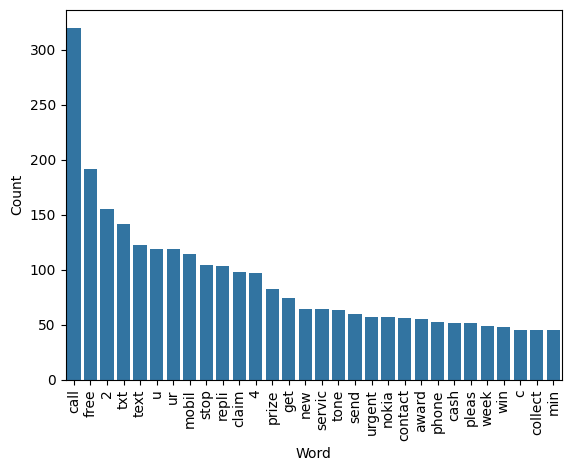

In [58]:
ww = pd.DataFrame(Counter(spam_corpus).most_common(30))
ww.columns = ['Word', 'Count']

sns.barplot(x="Word", y="Count", data=ww)   # works perfectly
plt.xticks(rotation=90)
plt.show() # this code is use to make bar graph of top 30 words of spam meassages 

In [59]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)  # ham corpus give no of word and it count how many time they repated

In [60]:
we=pd.DataFrame(Counter(ham_corpus).most_common(30)) 
we

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


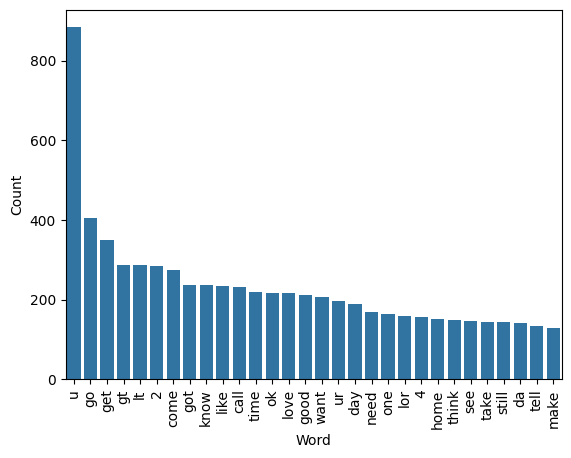

In [61]:
we=pd.DataFrame(Counter(ham_corpus).most_common(30))
we.columns = ['Word', 'Count']

sns.barplot(x="Word", y="Count", data=we)   # works perfectly
plt.xticks(rotation=90)
plt.show() # this code use  to make bar  graph of top 30 words of ham 

In [62]:
len(ham_corpus)

35404

In [63]:
# model building 

In [64]:
# PREPARE MODEL ( USING  COUNTVECTORIZER) and also use Tfidvectorizer then see  which  give good  
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)# first we see result for all data now we see same result for max value of data upto 3000

In [65]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [66]:
X.shape

(5169, 3000)

In [67]:
y=df['target'].values

In [68]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [71]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [72]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [73]:
# prefer gaussion test
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
# not good precision score is less

0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [74]:
# prefer multi test
mnb.fit(X_train,y_train)
y_pred1=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
# in this accuracy is good  but precision not good 

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [75]:
#prefer bernoulli test
bnb.fit(X_train,y_train)
y_pred1=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
# in this both are good 

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [76]:
# now we apply logistic regression 
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=3000)
lr.fit(X_train,y_train)
y_pred2=lr.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9545454545454546
[[894   2]
 [ 45  93]]
0.9789473684210527


In [77]:
# now we apply decision tree 
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(criterion="gini",random_state=42,max_depth=70)
dc.fit(X_train,y_train)
y_pred3=dc.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9506769825918762
[[869  27]
 [ 24 114]]
0.8085106382978723


In [78]:
# now we apply random forest 
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=50,random_state=42,max_depth=50,n_jobs=-1,oob_score=True)
rf.fit(X_train,y_train)
y_pred4=rf.predict(X_test)
print(accuracy_score(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))
print(precision_score(y_test,y_pred4))
print(rf.oob_score_)

0.9738878143133463
[[895   1]
 [ 26 112]]
0.9911504424778761
0.9685610640870617


In [79]:
# now we apply ensemble learning to see our accurarcy and precsion increase or not 

In [80]:
from sklearn.ensemble import VotingClassifier
vc=VotingClassifier(estimators=[('mnb',mnb),('lr',lr),('dc',dc),('rf',rf)],weights = [2, 1, 1, 3],voting='soft')
vc.fit(X_train,y_train)
y_pred5=vc.predict(X_test)
print(accuracy_score(y_test,y_pred5))
print(confusion_matrix(y_test,y_pred5))
print(precision_score(y_test,y_pred5))

0.97678916827853
[[896   0]
 [ 24 114]]
1.0


In [ ]:
# we select tdidf  with multinomialB (GIVE 100% PEECISISON)
# by ensemble  learnig we get best result 


In [82]:
# NOW WE TRY TO MODIFIED SOME THING THEN SEE ACCCURACY ,PRECISISON INCREASE OR NOT 
# after fixing  max value of data we observe that in multi model precision is same but accurarcy increase 

In [83]:
# now final step make pipe line ( like any message come so first it generate it transfromed text ,then vectorise that transformeed text at last apply algrorithim  

In [84]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(vc,open('model.pkl','wb'))

In [85]:
message = ["You have won a prize"]
vector = tfidf.transform(message)
vc.predict(vector)

array([0])

In [89]:
message = ["“Congratulations! You have won a ₹10,00,000 prize. Call now to claim"]
vector = tfidf.transform(message)
vc.predict(vector)

array([1])